## Visualization of model performance

In [6]:
import pathlib
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split

from models import ConvRegv1
from mlcore.training import make_predictions
from mlcore.eval import plot_stream_data

#### Model and Data Loading

In [2]:
# Load model
MODEL_DIR = pathlib.Path().cwd() / 'trained_models'
MODEL_FNAME = 'cnn_reg_1690846109.pt'
RANDOM_SEED = 42
TEST_RATIO = 0.2
BATCH_SIZE = 32

model = ConvRegv1(in_channels=2)
model.load_state_dict(torch.load(MODEL_DIR / MODEL_FNAME))

<All keys matched successfully>

In [3]:
# Load data and build Torch datasets
X, y = [], []

# Load the dataset
data_dir = '../../../data/pulses/single_pulse/'
pulse_list = np.load(data_dir + 'vp_single_num1000_win1000_pad60.npz')
pulses = list(pulse_list['pulses'])
print(len(pulses))

# Split labels and training samples while also doing feature scaling on the labels
for element in pulses:
    X.append(element[0:2,:])
    y.append(element[3][np.argwhere(element[2] == 1)])


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_RATIO, # Ratio of test data to use from full dataset; Training is the complement
    random_state=RANDOM_SEED
)

# Convert the lists to Tensors. Converting to np arrays first based on warning from torch
X_train = torch.Tensor(np.array(X_train))
X_test = torch.Tensor(np.array(X_test))
y_train = torch.Tensor(np.array(y_train))
y_test = torch.Tensor(np.array(y_test))

# Convert from numpy arrays to Tensors and create datasets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

1000


### Model Predictions and Visualization

In [23]:
# Pick k random samples/labels from the test data and plot them along with the predictions
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_dataset), k=50): # random.sample samples k elements from the given population without replacement; returns list of samples.
    test_samples.append(sample)
    test_labels.append(label)

print(f'Test Sample Shape: {test_samples[0].shape}, Test Label Shape: {test_labels[0].shape}')
preds = make_predictions(model, [x.unsqueeze(dim=0) for x in test_samples]) # returns a tensor
print(f'Preds shape {preds[0].shape}')

Test Sample Shape: torch.Size([2, 1000]), Test Label Shape: torch.Size([1, 1])
Preds shape torch.Size([1, 1, 1])


In [27]:

diff = [torch.abs(y_pred - y_true).item() for y_pred, y_true in zip(preds, test_labels)]
max(diff)

0.037083208560943604

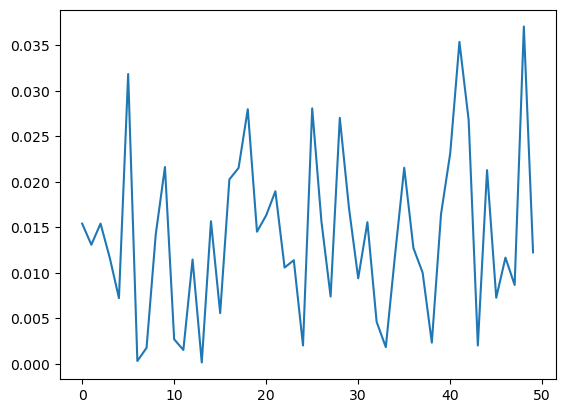

In [25]:
plt.figure()
plt.plot(np.arange(len(diff)), diff)
plt.show()

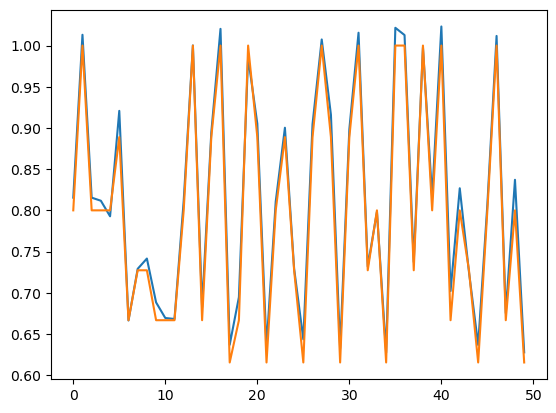

In [26]:
plt.figure()
plt.plot(np.arange(len(preds)), [pred.item() for pred in preds])
plt.plot(np.arange(len(test_labels)), [label.item() for label in test_labels])
plt.show()